ECE 457b Assignment 2 <br/>  Tristan Curry 20711720 <br/> March 14th 2022

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import random
import math
import sklearn
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from IPython import display
from sklearn import svm
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models, losses, datasets
from sklearn import model_selection
from keras.utils import np_utils

## Question 1 - Set up

In [9]:
importedData = np.genfromtxt("Wine_Dataset.csv", delimiter=",")
featureData = importedData[1:,:11]
labels = importedData[1:,11].reshape(-1)

# normalize the data
normRange = MinMaxScaler(feature_range = (0,1))
normData = normRange.fit_transform(featureData)

# assign data for inputs and targets
X_train, X_test, y_train, y_test = train_test_split(normData, labels, test_size = 0.2, random_state = 109)

# values of C
# CLinear = [1,10,20,30], C RBF and Poly = [1,10,50,100]
C = 100
CLinear = 30



## Question 1 - Linear

In [10]:
# Define model
clf = svm.SVC(kernel = 'linear', C = CLinear)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Linear Accuracy:", metrics.accuracy_score(y_test, y_pred))

Linear Accuracy: 0.5223076923076924


| C        |      Accuracy |
|----------|:-------------:|
| 1        | 0.5215385     |
| 10       | 0.5207692     |
| 20       | 0.5223077     |
| 30       | 0.5223077     |

## Question 1 - RBF

In [11]:
# Define model
clf = svm.SVC(kernel = 'rbf', C = C)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("RBF Accuracy:", metrics.accuracy_score(y_test, y_pred))

RBF Accuracy: 0.5653846153846154


| C        |      Accuracy |
|----------|:-------------:|
| 1        | 0.5446153     |
| 10       | 0.5615384     |
| 50       | 0.5676923     |
| 100      | 0.5653846     |

## Question 1 - Poly

In [12]:
# Define model
clf = svm.SVC(kernel = 'poly', C = C)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Poly Accuracy:", metrics.accuracy_score(y_test, y_pred))

Poly Accuracy: 0.5576923076923077


| C        |      Accuracy |
|----------|:-------------:|
| 1        | 0.5507769     |
| 10       | 0.5546154     |
| 50       | 0.5530769     |
| 100      | 0.5576923     |

## Question 1 b - conclusions

From the previous models, it can be seen that the accuracy for the Linear model is lower than those of both the polynomial and RBF, while the RBF contains the higheest accuracies for the data set. Linear often contains lower accurarcy in comparison to the other classifier types, as it attempts to linearly seperate the data, which in this case is not always feasible. The RBF and the Polynomial types create non-linear seperators that can better seperate the non-linear data.

## Question 1c - best model refinement

The best model from Question 1A is the RBF with C = 50 and gamma = "scale". Gamma for this data can be calculated based on the formula provided by SKLearn. gamma = 1/(num_features*X_train.var()) = 4.3645

In [13]:
# from the number of features in the wine dataset
num_features = 11
gamma = 1/(num_features * X_train.var())
print(gamma)

4.364586356733945


In [14]:
gamma = 4.3645

bestModel = svm.SVC(kernel = 'rbf', C = 50, gamma = gamma)
bestModel.fit(X_train, y_train)

y_pred = bestModel.predict(X_test)
print("RBF Accuracy:", metrics.accuracy_score(y_test, y_pred))

RBF Accuracy: 0.5676923076923077


In [15]:
gamma = 4.72

bestModel = svm.SVC(kernel = 'rbf', C = 50, gamma = gamma)
bestModel.fit(X_train, y_train)

y_pred = bestModel.predict(X_test)
print("RBF Accuracy:", metrics.accuracy_score(y_test, y_pred))

RBF Accuracy: 0.5661538461538461


In [16]:
# setting gamma to a value much lower than calculated
gamma = 0.1

bestModel = svm.SVC(kernel = 'rbf', C = 50, gamma = gamma)
bestModel.fit(X_train, y_train)

y_pred = bestModel.predict(X_test)
print("RBF Accuracy:", metrics.accuracy_score(y_test, y_pred))

RBF Accuracy: 0.5215384615384615


In [17]:
# setting gamma to a value much higher than calculated
gamma = 1000

bestModel = svm.SVC(kernel = 'rbf', C = 50, gamma = gamma)
bestModel.fit(X_train, y_train)

y_pred = bestModel.predict(X_test)
print("RBF Accuracy:", metrics.accuracy_score(y_test, y_pred))

RBF Accuracy: 0.6092307692307692


It is important to choose appropriate values of Gamma as if gamma is too large, the radius of the area of influence will be too large, thus only the support vector will be included and no value of C will correct for this, encouraging overfitting to occur. However if it is too small, the model is too constrained to capture the data properly, leading to a model that is similar to a linear one. 

## Question 2

#### Question 2 a)

Initial randomly selected grid


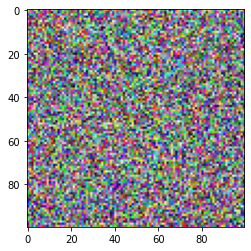

In [18]:
# input data
inputColours = np.array([
    [255,51,51],
    [255,102,102],
    [255,0,0],
    [255,150,150],
    [0,0,153],
    [0,0,102],
    [0,0,255],
    [102,102,255],
    [51,51,255],
    [0,153,76],
    [0,255,0],
    [0,255,58],
    [51,255,51],
    [0,102,0],
    [76,153,0],
    [255,255,0],
    [255,255,102],
    [0,255,255],
    [51,255,255],
    [255,0,255],
    [255,60,255],
    [0,102,0],
    [204,255,204],
    [153,0,0]])

normRGB = inputColours/255
plt.imshow(np.reshape(normRGB,(normRGB.shape[0],1,3)))

# Initialize the system
space_size = 100 # 100 x 100 grid of neurons
alpha_0 = 0.8
Nc = 20
max_epochs = 1000
sigma_0 = 1
    

# Initialize random weights
w = np.random.random((space_size,space_size,3))

print("Initial randomly selected grid")
plt.imshow(w)

Epoch Number: 20.0


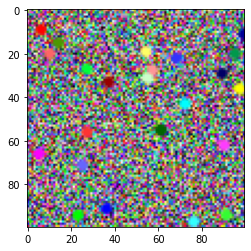

Epoch Number: 40.0


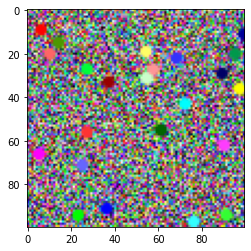

Epoch Number: 100.0


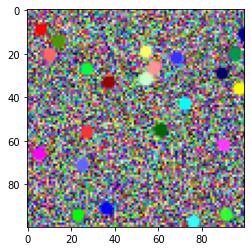

Epoch Number: 1000.0


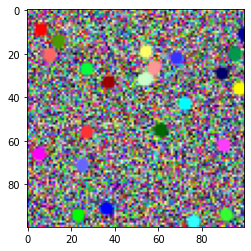

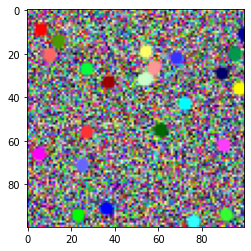

In [19]:
# SOM algorithm
epoch = 1
alpha = alpha_0

while epoch <= max_epochs:
    # adjust the learning rate and sigma value by the given scheme
    alpha = alpha_0 * math.exp(-1*(epoch/max_epochs))
    sigma = sigma_0 * math.exp(-1*(epoch/max_epochs))
    
    for x in normRGB:
        # calculate performance index
        diff = np.linalg.norm(x - w, axis =2)
        # find index of winning node
        ind = np.unravel_index(np.argmin(diff, axis=None), diff.shape)
        
        # Update weights for neighbourhood
        for i in range(0, 100):
            for j in range(0, 100):
                dsq = (ind[0]-i)*(ind[0]-i) + (ind[1]-j)*(ind[1]-j)
                N = math.exp(-dsq/(2*(sigma**2)))
                w[i][j] += alpha * N * (x - w[i][j])

    plot_ind = [20, 40, 100, 1000]
    if epoch in plot_ind:
        print("Epoch Number: {}".format(epoch))
        plt.imshow(w)
        display.display(plt.gcf())
    epoch += 1.

#### Question 2 b) - Conclusions

From the generated plots of the SOM, the graphs show that the initial graphs 100x100 grid, is able to be organized into regions of colour, which overtime are able to grow in region. These concentrated coloured regions are much smaller than those found in the tutorial SOM example, this is due to the exponential rate at which the neighbourhood function is reduced, while the tutorial updates the weight if the value is within a certain range, thus more nodes are updated. 

## Question 3 - a)

In [3]:
# load data and split into train and test, then discard training data as per scheme
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train, x_discard, y_train, y_discard = model_selection.train_test_split(x_train, y_train, test_size=0.8)

num_classes = 10

# get and normalize the data
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255

epochs = 5

## 1- MLP 

In [4]:
x_trainMLP = x_train.reshape(-1, 3072)
x_testMLP = x_test.reshape(-1, 3072)

modelMLP = models.Sequential()
modelMLP.add(layers.Dense(512, activation = 'sigmoid'))
modelMLP.add(layers.Dense(512, activation = 'sigmoid'))
modelMLP.add(layers.Dense(10, activation = 'softmax')) 

modelMLP.compile(loss='categorical_crossentropy', optimizer = 'adam',metrics=['accuracy'])

# fitting the model using the training data and validation data
modelMLP.fit(x_trainMLP, y_train, epochs=epochs, validation_data=(x_testMLP, y_test), verbose=1)

                

Epoch 1/5
313/313 [==============================] - 3s 8ms/step - loss: 2.0758 - accuracy: 0.2368 - val_loss: 1.9947 - val_accuracy: 0.2511
Epoch 2/5
313/313 [==============================] - 2s 8ms/step - loss: 1.9208 - accuracy: 0.3059 - val_loss: 1.9547 - val_accuracy: 0.3035
Epoch 3/5
313/313 [==============================] - 3s 8ms/step - loss: 1.8767 - accuracy: 0.3203 - val_loss: 1.8674 - val_accuracy: 0.3345
Epoch 4/5
313/313 [==============================] - 2s 8ms/step - loss: 1.8185 - accuracy: 0.3408 - val_loss: 1.7683 - val_accuracy: 0.3616
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 1.7810 - accuracy: 0.3550 - val_loss: 1.7353 - val_accuracy: 0.3787


## 2- CNN with Flatten

In [5]:
model1 = models.Sequential()
model1.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.Flatten(data_format = None))
model1.add(layers.Dense(512, activation = 'sigmoid'))
model1.add(layers.Dense(512, activation = 'sigmoid'))
model1.add(layers.Dense(10, activation = 'softmax')) 

model1.compile(loss='categorical_crossentropy', optimizer = "adam", metrics=['accuracy'])

CNN1Results = model1.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test), verbose=1)

Epoch 1/5
313/313 [==============================] - 42s 133ms/step - loss: 1.7455 - accuracy: 0.3558 - val_loss: 1.4758 - val_accuracy: 0.4604
Epoch 2/5
313/313 [==============================] - 41s 132ms/step - loss: 1.2887 - accuracy: 0.5378 - val_loss: 1.3040 - val_accuracy: 0.5313
Epoch 3/5
313/313 [==============================] - 42s 133ms/step - loss: 0.8983 - accuracy: 0.6837 - val_loss: 1.3258 - val_accuracy: 0.5443
Epoch 4/5
313/313 [==============================] - 42s 134ms/step - loss: 0.4606 - accuracy: 0.8517 - val_loss: 1.4035 - val_accuracy: 0.5598
Epoch 5/5
313/313 [==============================] - 42s 133ms/step - loss: 0.1429 - accuracy: 0.9632 - val_loss: 1.6141 - val_accuracy: 0.5588


## 3- CNN with Pooling and Flatten

In [6]:
model2 = models.Sequential()
model2.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten(data_format = None))
model2.add(layers.Dense(512, activation = 'sigmoid'))
model2.add(layers.Dropout(0.2))
model2.add(layers.Dense(512, activation = 'sigmoid'))
model2.add(layers.Dropout(0.2))
model2.add(layers.Dense(10, activation = 'softmax')) 

model2.compile(loss='categorical_crossentropy', optimizer = "adam", metrics=['accuracy'])

CNN2Results = model2.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test),verbose=1)

Epoch 1/5
313/313 [==============================] - 8s 26ms/step - loss: 1.9754 - accuracy: 0.2604 - val_loss: 1.5974 - val_accuracy: 0.4173
Epoch 2/5
313/313 [==============================] - 8s 25ms/step - loss: 1.5798 - accuracy: 0.4139 - val_loss: 1.4259 - val_accuracy: 0.4789
Epoch 3/5
313/313 [==============================] - 8s 26ms/step - loss: 1.4260 - accuracy: 0.4787 - val_loss: 1.4474 - val_accuracy: 0.4673
Epoch 4/5
313/313 [==============================] - 8s 26ms/step - loss: 1.3080 - accuracy: 0.5219 - val_loss: 1.3008 - val_accuracy: 0.5326
Epoch 5/5
313/313 [==============================] - 8s 26ms/step - loss: 1.2124 - accuracy: 0.5657 - val_loss: 1.2431 - val_accuracy: 0.5516


### Question 3 - b)

Text(0, 0.5, 'Accuracy')

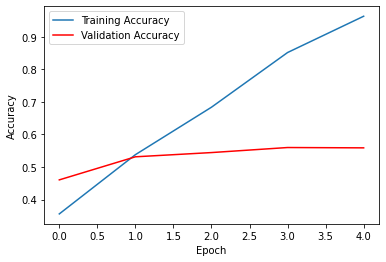

In [7]:
plt.plot(CNN1Results.history["accuracy"])
plt.plot(CNN1Results.history["val_accuracy"], "r")
plt.legend(["Training Accuracy", "Validation Accuracy"])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

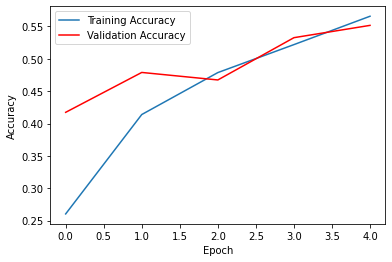

In [8]:
plt.plot(CNN2Results.history["accuracy"])
plt.plot(CNN2Results.history["val_accuracy"], "r")
plt.legend(["Training Accuracy", "Validation Accuracy"])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

From the above plots it can be seen that the CNN utilizing convolution and flatten layers, without pooling, is able to learn from the training data much faster, but becomes suseptible to overfitting very easily. After the 4th epoch of training the training accuracy has increased to above 90% accuracy but the validation acccuracy does not increase substantially. This is mostly due to how the flatten layer is utilized in the model without pooling. Without a pooling layer, the model will not be able to effectively determine important features. This inability to interpret the important features of the image will result in good training accuracy, as the model begins to memorize the data rather than learn, but poor testing  accuracy. This case is shown in the first generated graph.

From the second plot, which utlizies max pooling, dropout, and flatten layers. The Max pooling layers are used to shrink the size of the data, in doing so, the max pooling method will be able to learn the most important features of the data set. Once the model has pooled twice, the model utilizes the flatten layer to condense the data into a one column feature vector before passing it to the fully connected learning layers. In between fully connected layers dopout layers are used to help prevent overfitting of the data. Dropout layers help reduce the amount that the first batch of training data effects the learning weights, as often the first batch of data will effect the weights at a disproportional amount.

The traiing time for the first CNN model is much higher than that of the second CNN model. The first model's training time is much higher due to the size of the flatten layer. As it has not been pooled, the layer is much larger than that of the second model, leading to a higher number of computations needing to be done. While the second models training time is much lower due to the model reducing the size of the data prior to flattening. Finally, if the number of training epochs is increased, the first model's training accuracy will continue to rise as it continues to memorize the training data, but the validation accuracy will not increase and will continue to stay around the current level. However for the second model, the training accuracy and validation accuracy will rise until the model begins to become overfitted, which will take longer to to reach due to the dropout layers.